In [1]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Add this line to your existing imports
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
import os
import pickle
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
from regression_model_hyperparameters import regressors

In [3]:
pwd = os.getcwd()
print(pwd)

/user/mdtohidu/my_folder/CCR_supercon_v3


In [4]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
data = pd.read_csv(pwd+"/data/selected_features_Tc.csv")
print("Shape of the dataset is: ", data.shape)

data.head()

Shape of the dataset is:  (11968, 77)


,composition,Tc,composition_type,pymatgen_composition,MagpieData range Number,MagpieData avg_dev Number,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,MagpieData maximum AtomicWeight,MagpieData minimum MeltingT,...,MagpieData maximum SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,LUMO_energy,0-norm,2-norm,avg d valence electrons,avg f valence electrons,frac p valence electrons,frac d valence electrons
0,Ba0.4K0.6Fe2As2,31.20,Other,Ba0.4 K0.6 Fe2 As2,37.0,6.214400,81.0,56.680000,137.32700,336.53,...,229.0,30.240000,166.0,-0.197978,4.0,0.583781,6.400000,0.000000,0.126582,0.675105
1,Ca0.4Ba1.25La1.25Cu3O6.98,40.10,Oxide,Ca0.4 Ba1.25 La1.25 Cu3 O6.98,49.0,16.074864,80.0,64.406832,138.90547,54.80,...,229.0,102.911141,12.0,-0.202272,5.0,0.606413,2.426242,0.000000,0.340779,0.381423
2,Mo0.39Ru0.61,6.90,Other,Mo0.39 Ru0.61,2.0,0.951600,6.0,53.660000,101.07000,2607.00,...,229.0,16.653000,194.0,-0.153347,2.0,0.724017,6.220000,0.000000,0.000000,0.861496
3,Tm4Os6Sn19,1.10,Stannide,Tm4 Os6 Sn19,26.0,10.482759,43.0,69.310345,190.23000,505.08,...,194.0,23.947681,141.0,-0.144450,3.0,0.700772,7.793103,4.689655,0.082969,0.493450
4,Nd1Bi0.99Pb0.01S2F0.3O0.7,4.85,Oxide,Nd1 Bi0.99 Pb0.01 S2 F0.3 O0.7,75.0,27.869600,74.0,73.950000,208.98040,53.50,...,225.0,49.328776,70.0,-0.180198,6.0,0.512258,2.000000,3.600000,0.286921,0.187652


In [6]:
X = data.iloc[:, 4:]
y = data.Tc

In [7]:
feature_names = X.columns

In [8]:
from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler()

In [9]:
X = pd.DataFrame(scaler.fit_transform(X), columns=feature_names)
X.head()

,MagpieData range Number,MagpieData avg_dev Number,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,MagpieData maximum AtomicWeight,MagpieData minimum MeltingT,MagpieData maximum MeltingT,MagpieData range MeltingT,MagpieData avg_dev MeltingT,MagpieData mode MeltingT,...,MagpieData maximum SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,LUMO_energy,0-norm,2-norm,avg d valence electrons,avg f valence electrons,frac p valence electrons,frac d valence electrons
0,0.456790,0.155360,0.852632,0.577204,0.638423,0.084673,0.466058,0.387103,0.229536,0.282487,...,1.000000,0.271211,0.722467,0.540673,0.428571,0.299863,0.640000,0.000000,0.189873,0.720113
1,0.604938,0.401872,0.842105,0.660289,0.646389,0.010709,0.345780,0.342078,0.315899,0.010709,...,1.000000,0.922970,0.044053,0.524137,0.571429,0.337933,0.242624,0.000000,0.511168,0.406851
2,0.024691,0.023790,0.063158,0.544731,0.455464,0.680755,0.753994,0.075873,0.074410,0.680755,...,1.000000,0.149354,0.845815,0.712541,0.142857,0.535759,0.622000,0.000000,0.000000,0.918929
3,0.320988,0.262069,0.452632,0.713014,0.905382,0.128924,0.862799,0.735345,0.539319,0.128924,...,0.845815,0.214777,0.612335,0.746802,0.285714,0.496659,0.779310,0.334975,0.124454,0.526346
4,0.925926,0.696740,0.778947,0.762903,1.000000,0.010368,0.328857,0.325677,0.166871,0.098281,...,0.982379,0.442411,0.299559,0.609141,0.714286,0.179552,0.200000,0.257143,0.430381,0.200163


In [10]:
import shutil

# If the 'saved_models' directory exists, remove it and everything in it
if os.path.exists('saved_scaler'):
    shutil.rmtree('saved_scaler')

# Create a new 'saved_models' directory
os.makedirs('saved_scaler')

from pickle import dump
# save the scaler
dump(scaler, open(pwd + '/saved_scaler/trained_scaler.pkl', 'wb'))

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# If the 'saved_models' directory exists, remove it and everything in it
if os.path.exists('saved_models'):
    shutil.rmtree('saved_models')

# Create a new 'saved_models' directory
os.makedirs('saved_models')

In [13]:
best_regressors = {}
best_params = {}

# Initialize the hyper_param_tuning_results dataframe
hyper_param_tuning_results = pd.DataFrame(columns=["Regressor", "Best_CV_score", 
                            "RMSE", "R2_score"])


# Perform RandomizedSearchCV for each regressor
for regressor_name, regressor_details in regressors.items():
    model = regressor_details["model"]
    params = regressor_details["params"]

    rscv = RandomizedSearchCV(
        model, params, n_iter=100, n_jobs=-1, cv=5, verbose=1, random_state=42
    )
    rscv.fit(X_train, y_train)

    best_model = rscv.best_estimator_
    best_regressors[regressor_name] = best_model
    best_params[regressor_name] = rscv.best_params_
    
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"{regressor_name}:")
    print(f"Best CV Score: {rscv.best_score_}")
    print(f"RMSE: {rmse}")
    print(f"R2 Score: {r2}")
    print(f"Best Parameters: {rscv.best_params_}")
    print("-" * 100)
    
    # Save the model as a pickle file
    with open(f'saved_models/{regressor_name}_optimized.pkl', 'wb') as f:
        pickle.dump(best_model, f)
    
    # Append the results to the hyper_param_tuning_results dataframe
    result = pd.DataFrame(
        {"Regressor": [regressor_name],
         "Best_CV_score": [rscv.best_score_],
         "RMSE": [rmse],
         "R2_score": [r2]
         }
    )
    hyper_param_tuning_results = pd.concat([hyper_param_tuning_results, result], ignore_index=True)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x1551f94ecf70>
Traceback (most recent call last):
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/softwa

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x14c12e317f70>
Traceback (most recent call last):
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x14f5e2c46f70>
Traceback (most recent call last):
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x14dd2818eb80>
Traceback (most recent call last):
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/softwa

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x14659acfcb80>
Traceback (most recent call last):
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/softwa

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x1520decbea60>
Traceback (most recent call last):
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x152bd612ba60>
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x14b3d0992b80>
Traceback (most recent call last):
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/softwa

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x152bdee6cb80>
Traceback (most recent call last):
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
Exception ignored on calling ctypes callback function: <function _Thr

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x1540350f5b80>
Traceback (most recent call last):
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/softwa

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x147a090c0b80>
Traceback (most recent call last):
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/softwa

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x14967c8bea60>
Traceback (most recent call last):
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/softwa

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x14b3d0992b80>
Traceback (most recent call last):
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/softwa

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x152bdee6cb80>
Traceback (most recent call last):
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/softwa

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x14b86e857b80>
Traceback (most recent call last):
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/softwa

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x1551fff71b80>
Traceback (most recent call last):
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/softwa

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x14967c8bea60>
Traceback (most recent call last):
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/softwa

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x14659acfcb80>
Traceback (most recent call last):
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/softwa

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x152bdee6cb80>
Traceback (most recent call last):
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/softwa

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x14c80b43eb80>
Traceback (most recent call last):
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/softwa

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x14c80b43eb80>
Traceback (most recent call last):
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/software/avx512/Compiler/gcccore/11.2.0/python/3.9.6/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/cvmfs/soft.ccr.buffalo.edu/versions/2023.01/easybuild/softwa

KNeighborsRegressor:
Best CV Score: 0.9012399323039938
RMSE: 8.39943802086526
R2 Score: 0.9100303494912109
Best Parameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 5, 'leaf_size': 36, 'algorithm': 'ball_tree'}
----------------------------------------------------------------------------------------------------
Fitting 5 folds for each of 100 candidates, totalling 500 fits
DecisionTreeRegressor:
Best CV Score: 0.8448543489967021
RMSE: 10.382836849730811
R2 Score: 0.8625237638461324
Best Parameters: {'splitter': 'best', 'min_samples_split': 10, 'min_samples_leaf': 6, 'max_features': None, 'max_depth': None}
----------------------------------------------------------------------------------------------------
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/user/mdtohidu/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
160 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
56 fits failed with the following error:
Traceback (most recent call last):
  File "/user/mdtohidu/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/user/mdtohidu/.local/lib/python3.9/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/user/mdtohidu/.local/lib/python3.9/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/user/mdtohid

RandomForestRegressor:
Best CV Score: 0.908190428387555
RMSE: 7.72362657171657
R2 Score: 0.9239256746104925
Best Parameters: {'n_estimators': 260, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 25}
----------------------------------------------------------------------------------------------------
Fitting 5 folds for each of 100 candidates, totalling 500 fits
XGBoostRegressor:
Best CV Score: 0.9131126913579489
RMSE: 7.581172418822149
R2 Score: 0.9267060172391846
Best Parameters: {'subsample': 0.9, 'n_estimators': 485, 'max_depth': 16, 'learning_rate': 0.01, 'gamma': 0.9, 'colsample_bytree': 0.2}
----------------------------------------------------------------------------------------------------
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/user/mdtohidu/.local/lib/python3.9/site-packages/sklearn/linear_model/_bayes.py:54: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
/user/mdtohidu/.local/lib/python3.9/site-packages/sklearn/linear_model/_bayes.py:54: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
/user/mdtohidu/.local/lib/python3.9/site-packages/sklearn/linear_model/_bayes.py:54: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
/user/mdtohidu/.local/lib/python3.9/site-packages/sklearn/linear_model/_bayes.py:54: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
/user/mdtohidu/.local/lib/python3.9/site-packages/sklearn/linear_model/_bayes.py:54: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
/user/mdtohidu/.local/lib/pyth

/user/mdtohidu/.local/lib/python3.9/site-packages/sklearn/linear_model/_bayes.py:54: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
/user/mdtohidu/.local/lib/python3.9/site-packages/sklearn/linear_model/_bayes.py:54: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
/user/mdtohidu/.local/lib/python3.9/site-packages/sklearn/linear_model/_bayes.py:54: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
/user/mdtohidu/.local/lib/python3.9/site-packages/sklearn/linear_model/_bayes.py:54: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
/user/mdtohidu/.local/lib/python3.9/site-packages/sklearn/linear_model/_bayes.py:54: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
/user/mdtohidu/.local/lib/pyth

/user/mdtohidu/.local/lib/python3.9/site-packages/sklearn/linear_model/_bayes.py:54: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
/user/mdtohidu/.local/lib/python3.9/site-packages/sklearn/linear_model/_bayes.py:54: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
/user/mdtohidu/.local/lib/python3.9/site-packages/sklearn/linear_model/_bayes.py:54: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
/user/mdtohidu/.local/lib/python3.9/site-packages/sklearn/linear_model/_bayes.py:54: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
/user/mdtohidu/.local/lib/python3.9/site-packages/sklearn/linear_model/_bayes.py:54: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
/user/mdtohidu/.local/lib/pyth

/user/mdtohidu/.local/lib/python3.9/site-packages/sklearn/linear_model/_bayes.py:54: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
/user/mdtohidu/.local/lib/python3.9/site-packages/sklearn/linear_model/_bayes.py:54: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
/user/mdtohidu/.local/lib/python3.9/site-packages/sklearn/linear_model/_bayes.py:54: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
/user/mdtohidu/.local/lib/python3.9/site-packages/sklearn/linear_model/_bayes.py:54: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
/user/mdtohidu/.local/lib/python3.9/site-packages/sklearn/linear_model/_bayes.py:54: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
/user/mdtohidu/.local/lib/pyth

/user/mdtohidu/.local/lib/python3.9/site-packages/sklearn/linear_model/_bayes.py:54: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
/user/mdtohidu/.local/lib/python3.9/site-packages/sklearn/linear_model/_bayes.py:54: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
/user/mdtohidu/.local/lib/python3.9/site-packages/sklearn/linear_model/_bayes.py:54: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
/user/mdtohidu/.local/lib/python3.9/site-packages/sklearn/linear_model/_bayes.py:54: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
/user/mdtohidu/.local/lib/python3.9/site-packages/sklearn/linear_model/_bayes.py:54: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
/user/mdtohidu/.local/lib/pyth

/user/mdtohidu/.local/lib/python3.9/site-packages/sklearn/linear_model/_bayes.py:54: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
/user/mdtohidu/.local/lib/python3.9/site-packages/sklearn/linear_model/_bayes.py:54: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
/user/mdtohidu/.local/lib/python3.9/site-packages/sklearn/linear_model/_bayes.py:54: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
/user/mdtohidu/.local/lib/python3.9/site-packages/sklearn/linear_model/_bayes.py:54: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
/user/mdtohidu/.local/lib/python3.9/site-packages/sklearn/linear_model/_bayes.py:54: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(
/user/mdtohidu/.local/lib/pyth

/user/mdtohidu/.local/lib/python3.9/site-packages/sklearn/linear_model/_bayes.py:54: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.3 and will be removed in 1.5
  warnings.warn(


BayesianRidge:
Best CV Score: 0.6679474515560163
RMSE: 16.17375692462901
R2 Score: 0.6664066401366074
Best Parameters: {'tol': 1e-06, 'n_iter': 300, 'lambda_2': 0.09999999999999999, 'lambda_1': 9.999999999999999e-05, 'alpha_2': 9.999999999999999e-05, 'alpha_1': 100.0}
----------------------------------------------------------------------------------------------------
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/user/mdtohidu/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
240 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
23 fits failed with the following error:
Traceback (most recent call last):
  File "/user/mdtohidu/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/user/mdtohidu/.local/lib/python3.9/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/user/mdtohidu/.local/lib/python3.9/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/user/mdtohid

SGDRegressor:
Best CV Score: 0.6417263647494493
RMSE: 16.94010715491101
R2 Score: 0.6340448357883743
Best Parameters: {'tol': 9.999999999999999e-06, 'penalty': 'elasticnet', 'max_iter': 10000, 'loss': 'huber', 'learning_rate': 'optimal', 'alpha': 1e-06}
----------------------------------------------------------------------------------------------------
Fitting 5 folds for each of 100 candidates, totalling 500 fits
AdaBoostRegressor:
Best CV Score: 0.7307444939834034
RMSE: 14.092726422362846
R2 Score: 0.7467289118747629
Best Parameters: {'n_estimators': 475, 'loss': 'exponential', 'learning_rate': 0.01}
----------------------------------------------------------------------------------------------------
Fitting 5 folds for each of 100 candidates, totalling 500 fits


/user/mdtohidu/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/user/mdtohidu/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/user/mdtohidu/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/user/mdtohidu/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/user/mdtohidu/.local/lib/python3.9/site-pac

/user/mdtohidu/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/user/mdtohidu/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/user/mdtohidu/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/user/mdtohidu/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/user/mdtohidu/.local/lib/python3.9/site-pac

/user/mdtohidu/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/user/mdtohidu/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/user/mdtohidu/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/user/mdtohidu/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/user/mdtohidu/.local/lib/python3.9/site-pac

MLPRegressor:
Best CV Score: 0.8173316863734954
RMSE: 11.007634693666335
R2 Score: 0.8454803945441436
Best Parameters: {'solver': 'adam', 'max_iter': 500, 'learning_rate_init': 0.001, 'hidden_layer_sizes': (100, 100), 'alpha': 0.001, 'activation': 'tanh'}
----------------------------------------------------------------------------------------------------


In [14]:
# Show the hyper_param_tuning_results dataframe
hyper_param_tuning_results = hyper_param_tuning_results[hyper_param_tuning_results["Best_CV_score"] >= 0]
hyper_param_tuning_results = hyper_param_tuning_results[hyper_param_tuning_results["R2_score"] >= 0]
hyper_param_tuning_results

,Regressor,Best_CV_score,RMSE,R2_score
0,KNeighborsRegressor,0.901240,8.399438,0.910030
1,DecisionTreeRegressor,0.844854,10.382837,0.862524
2,RandomForestRegressor,0.908190,7.723627,0.923926
3,XGBoostRegressor,0.913113,7.581172,0.926706
4,BayesianRidge,0.667947,16.173757,0.666407
5,SGDRegressor,0.641726,16.940107,0.634045
6,AdaBoostRegressor,0.730744,14.092726,0.746729
7,MLPRegressor,0.817332,11.007635,0.845480


In [15]:
#hyper_param_tuning_results.to_excel(pwd + "/hyper_param_tuning_results.xlsx", index=False)

/scratch/15389731/ipykernel_416798/4027886350.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Best_CV_score", y="Regressor", data=hyper_param_tuning_results, ax=axs[0], palette="Blues_d")
/scratch/15389731/ipykernel_416798/4027886350.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="RMSE", y="Regressor", data=hyper_param_tuning_results, ax=axs[1], palette="Blues_d")
/scratch/15389731/ipykernel_416798/4027886350.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="R2_score", y="Regressor", data=hyper_param_tuning_results, ax=

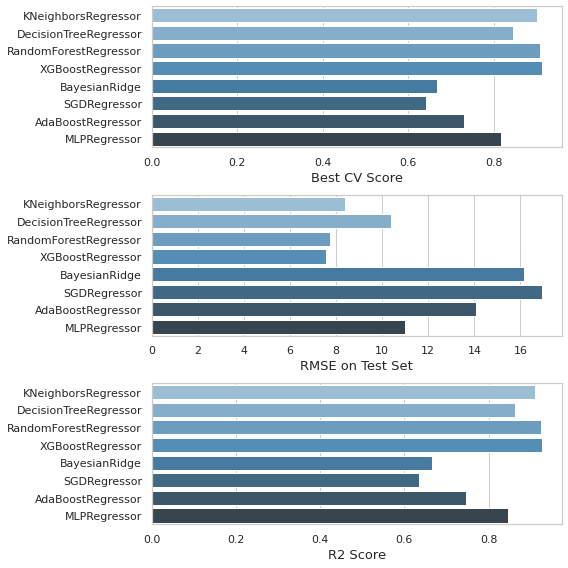

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_theme(style="whitegrid")

# Create subplots: 3 rows and 1 column
fig, axs = plt.subplots(3, 1, figsize=(8, 8))


# Barplot for Best CV Score
sns.barplot(x="Best_CV_score", y="Regressor", data=hyper_param_tuning_results, ax=axs[0], palette="Blues_d")
axs[0].set_xlabel('Best CV Score', size=13)
axs[0].set_ylabel('')

# Barplot for Mean Squared Error on Test Set
sns.barplot(x="RMSE", y="Regressor", data=hyper_param_tuning_results, ax=axs[1], palette="Blues_d")
axs[1].set_xlabel('RMSE on Test Set', size=13)
axs[1].set_ylabel('')

# Barplot for R2 Score
sns.barplot(x="R2_score", y="Regressor", data=hyper_param_tuning_results, ax=axs[2], palette="Blues_d")
axs[2].set_xlabel('R2 Score', size=13)
axs[2].set_ylabel('')

# Display the plots
plt.tight_layout()
plt.show()